### **Exraction of Zip File**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


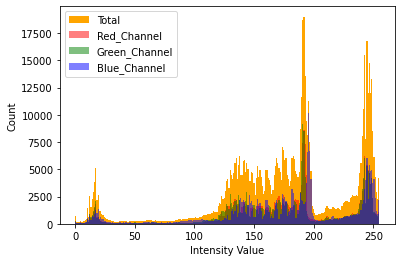

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('/content/Dataset/Tshirt/2.jpg')

plt.hist(image.ravel(), bins = 256, color = 'orange' )
plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

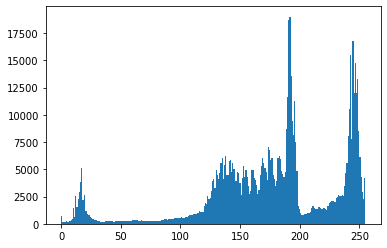

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
image = io.imread('/content/Dataset/Tshirt/2.jpg')
ax = plt.hist(image.ravel(), bins = 256)
plt.show()

### **Calling Dataset and labelling of Images categoriacally**

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

dir= '/content/drive/My Drive/MLProject/Datacl'
categories= ['Tshirt','kurti', 'shirt', 'skirt']
data=[]
for category in categories:
  path=os.path.join(dir,category)
  label=categories.index(category)

  for img in os.listdir(path):
    imgpath=os.path.join(path,img)
    clt_img=cv2.imread(imgpath,0)
    clt_img=cv2.resize(clt_img,(50,50))
    image=np.array(clt_img).flatten()

    data.append([image,label])



In [ ]:
image

array([249, 249, 249, ..., 226, 227, 226], dtype=uint8)

In [ ]:
data

[[array([234, 234, 234, ..., 233, 233, 234], dtype=uint8), 0],
 [array([253, 253, 253, ..., 253, 253, 253], dtype=uint8), 0],
 [array([187, 186, 186, ..., 170, 155, 147], dtype=uint8), 0],
 [array([182, 183, 184, ..., 161, 160, 157], dtype=uint8), 0],
 [array([200, 200, 200, ..., 139, 137, 136], dtype=uint8), 0],
 [array([184, 184, 185, ..., 141, 192, 174], dtype=uint8), 0],
 [array([221, 221, 220, ..., 154, 211, 212], dtype=uint8), 0],
 [array([233, 226,  30, ..., 218, 218, 217], dtype=uint8), 0],
 [array([184, 184, 188, ..., 165, 154,  59], dtype=uint8), 0],
 [array([181, 182, 183, ..., 170, 137, 180], dtype=uint8), 0],
 [array([ 94,  98,  98, ..., 179, 177, 176], dtype=uint8), 0],
 [array([183, 183, 185, ..., 203, 201, 200], dtype=uint8), 0],
 [array([241, 241, 241, ..., 227, 226, 226], dtype=uint8), 0],
 [array([176, 176, 177, ..., 130, 139, 125], dtype=uint8), 0],
 [array([226, 226, 226, ..., 209, 209, 207], dtype=uint8), 0],
 [array([172, 176, 176, ..., 170, 171, 171], dtype=uint

### **dumping data object into byte format**



In [ ]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

### **Loading dumped file**

In [ ]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

### **Random shuffling of data and appending features and labels**

In [ ]:
import random
random.shuffle(data)
features=[]
labels=[]

for feature, label in data:
  features.append(feature)
  labels.append(label)


### **Train and Test Data split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(features, labels, test_size=0.20)

## **1.) Fitting of model using SUPPORT VECTOR MACHINE(SVM) Algorithm**

In [ ]:
from sklearn.svm import SVC
model= SVC(C=1.0, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)




SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## **Prediction of the model as per SVM algorithm**

In [ ]:
prediction =model.predict(xtest)
prediction

array([2, 1, 3, 0, 3, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 3, 3, 3, 1, 0, 0,
       2, 1, 2, 1, 2, 3, 3, 3, 3, 2, 0, 1, 3, 3, 2, 3, 1, 3, 3, 1, 2, 2,
       0, 3, 1, 1, 0, 3, 1, 1, 3, 0, 1, 1, 0, 3, 3, 0, 3, 1, 0, 0, 3, 3,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 3, 1, 0, 0, 0, 3, 1, 2, 1, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 3, 1, 0, 3, 0, 2,
       0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3,
       1, 2, 3, 2, 2, 0, 0, 0])

### **Accuracy and testing of data model**

In [ ]:
accuracy=model.score(xtest, ytest)
categories= ['Tshirt','kurti', 'shirt', 'skirt']
print("Accuracy is :",accuracy)


Accuracy is : 0.7285714285714285


### **Classification Report for SVM**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.55      0.72      0.62        32
           1       0.82      0.89      0.85        35
           2       0.81      0.58      0.68        43
           3       0.79      0.77      0.78        30

    accuracy                           0.73       140
   macro avg       0.74      0.74      0.73       140
weighted avg       0.75      0.73      0.73       140



### **Confusion Matrix for SVM model**

In [ ]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(ytest,prediction)
c

array([[23,  1,  6,  2],
       [ 0, 31,  0,  4],
       [17,  1, 25,  0],
       [ 2,  5,  0, 23]])

prediction is:  Tshirt


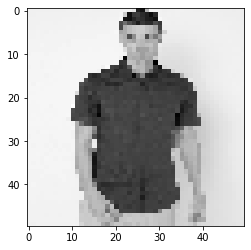

In [ ]:
print("prediction is: ", categories[prediction[5]])
mycloth=xtest[5].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

prediction is:  shirt


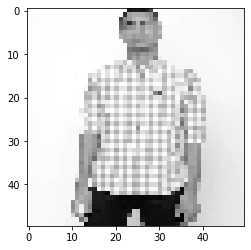

In [ ]:
print("prediction is: ", categories[prediction[6]])
mycloth=xtest[6].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

prediction is:  shirt


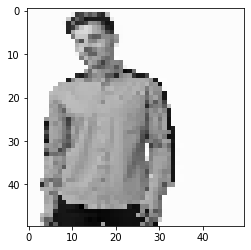

In [ ]:
print("prediction is: ", categories[prediction[7]])
mycloth=xtest[7].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

prediction is:  kurti


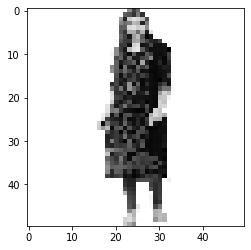

In [ ]:
print("prediction is: ", categories[prediction[9]])
mycloth=xtest[9].reshape(50,50)
plt.imshow(mycloth, cmap='gray')
plt.show()

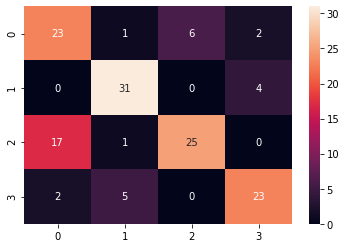

In [ ]:
import seaborn as sns
sns.heatmap(c,annot=True)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(ytest)
ytest = lb.transform(ytest)
pred = lb.transform(prediction)
roc=roc_auc_score(ytest, pred, average='macro')
print(roc)

0.8241915729971278
